In [2]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [3]:
df = pd.read_csv('data_cleaned.csv')

In [4]:
df

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,...,kafka_yn,microstrategy_yn,google_an_yn,spss_yn,job_simp,seniority_by_title,seniority_by_description,seniority,desc_len,desc_len_words
0,2024 University Graduate - Data Scientist,Employer Provided Salary:$83K - $153K,our company changing the world through digita...,4.4,Adobe\n4.4,"San Jose, CA",10000+ Employees,1982,Company - Public,Computer Hardware Development,...,0,0,0,0,data scientist,na,na,na,4862,729
1,Data Scientist – Entry Level 2024,Employer Provided Salary:$71K - $133K,introduction ranked by forbes as one of the wo...,3.9,IBM\n3.9,"Atlanta, GA",10000+ Employees,1911,Company - Public,Information Technology Support Services,...,0,0,0,0,data scientist,na,na,na,1444,239
2,Data Scientist 2,Employer Provided Salary:$94K - $183K,the microsoft 365 team is looking for a data s...,4.3,Microsoft\n4.3,"Redmond, WA",10000+ Employees,1975,Company - Public,Computer Hardware Development,...,0,0,0,0,data scientist,na,na,na,2003,292
3,Entry Level Data Scientist 2023/2024,$48K - $78K (Glassdoor est.),"you may not realize it, but you’ve likely used...",3.9,CPChem\n3.9,"The Woodlands, TX",1001 to 5000 Employees,2000,Company - Private,Chemical Manufacturing,...,0,0,0,0,data scientist,na,na,na,873,143
4,Data Scientist (C),Employer Provided Salary:$65.00 - $75.00 Per Hour,the team: at client’s artificial intelligence ...,-1.0,IVID TEK INC,Remote,1 to 50 Employees,-1,Company - Public,-1,...,0,0,0,0,data scientist,na,na,na,1247,193
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
675,Data Scientist,Employer Provided Salary:$75K - $130K,the jaaw group is proud to support the departm...,3.0,The JAAW Group,"Cottonwood Heights, UT",1 to 50 Employees,-1,Company - Private,-1,...,0,0,0,0,data scientist,na,na,na,615,89
676,Data Scientist,$86K - $118K (Glassdoor est.),"motor information systems, an owned subsidiary...",3.6,Kumo\n5.0,"Troy, MI",10000+ Employees,1887,Company - Private,Publishing,...,0,0,0,0,data scientist,na,na,na,1032,153
677,Database Administrator,Employer Provided Salary:$82K - $143K,"in a world of possibilities, pursue one with e...",3.7,Parsons\n3.9,Remote,10000+ Employees,1975,Company - Private,Investment & Asset Management,...,0,0,0,0,na,na,na,na,2453,385
678,-1,Employer Provided Salary:$70.00 - $73.00 Per Hour,-1,-1.0,-1,-1,na,-1,Company - Public,-1,...,0,0,0,0,na,na,na,na,2,1


# **Task - 1**
     Identify various Big Data job families in the given dataset

In [5]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Assuming df is your DataFrame
# You can load your dataset using pd.read_csv or any other appropriate method

# To download Natural Language ToolKit

# Download NLTK resources
#nltk.download('punkt')
#nltk.download('stopwords')

# Tokenize job titles and remove stop words
stop_words = set(stopwords.words('english'))

def tokenize_and_filter(title):
    tokens = word_tokenize(title)
    filtered_tokens = [token.lower() for token in tokens if token.isalnum() and token.lower() not in stop_words]
    return filtered_tokens

# Tokenize and filter job titles
df['Tokenized Title'] = df['Job Title'].apply(tokenize_and_filter)

# Identify common terms
common_terms = pd.Series([item for sublist in df['Tokenized Title'] for item in sublist]).value_counts()

# Define a threshold for common terms to include in a family
threshold = 10
big_data_families = common_terms[common_terms >= threshold].index.tolist()

# Create a new column 'Big Data Family' based on common terms in the job title
df['Big Data Family'] = df['Job Title'].apply(lambda title: next((family for family in big_data_families if family.lower() in title.lower()), 'Other'))

# Extract unique job titles for each Big Data family
big_data_families_jobs = {}
for family in big_data_families:
    family_jobs = df[df['Big Data Family'] == family]['Job Title'].unique()
    big_data_families_jobs[family] = family_jobs

# Print the unique job titles for each Big Data family
for family, jobs in big_data_families_jobs.items():
    print(f"{family} Jobs:")
    for job in jobs:
        print(f"  - {job}")
    print("\n")


data Jobs:
  - 2024 University Graduate - Data Scientist
  - Data Scientist – Entry Level 2024
  - Data Scientist 2
  - Entry Level Data Scientist 2023/2024
  - Data Scientist (C)
  - Senior Data Scientist
  - Data Scientist
  - Data Scientist- CalAIM
  - Junior Data Scientist
  - Entry Level - Associate Data Scientist - Commercial
  - Data Scientist, Analytics
  - Grace Hopper 2023: Data Scientist
  - Data Scientist - NLP
  - Data Scientist, Product
  - Data Scientist II
  - Data Scientist (Omics data analysis (genetics, genomics and proteomics))
  - Data Scientist, NLP
  - Data Analyst Associate
  - Aspire Program, Early Career -Data Scientist I
  - Data Scientist - Level 1
  - Data Scientist - BCG X
  - College Graduate - Data Science (BS/MS)
  - Jr. Data Scientist, Minerva Analytics
  - Research Data Science, Future Leaders Graduate Program, US, 2024
  - Data Scientist Level III
  - Associate Data Scientist
  - Environmental Data Scientist I
  - Research Data Analyst
  - Data Scien

# **Task - 2**
     Identify homogeneous groups of Big Data skills that are highly valued by companies

In [6]:
import pandas as pd

# Assuming df is your DataFrame
# You can load your dataset using pd.read_csv or any other appropriate method

# Select relevant skills columns for analysis
skills_columns = ['python_yn', 'R_yn', 'spark_yn', 'aws_yn', 'excel_yn', 'sql_yn', 'sas_yn', 'd3js_yn', 'julia_yn',
                   'jupyter_yn', 'keras_yn', 'matlab_yn', 'matplotlib_yn', 'pytorch_yn', 'scikit_yn', 'tensor_yn',
                   'weka_yn', 'selenium_yn', 'hadoop_yn', 'tableau_yn', 'bi_yn', 'bigml_yn', 'rapidminer_yn',
                   'flink_yn', 'datarobot_yn', 'hana_yn', 'mongo_yn', 'trifacta_yn', 'minitab_yn', 'kafka_yn',
                   'microstrategy_yn', 'google_an_yn', 'spss_yn']

# Calculate the total occurrence of each skill
skill_occurrences = df[skills_columns].sum()

# Sort skills by occurrence in descending order
sorted_skills = skill_occurrences.sort_values(ascending=False)

# Display the sorted skills
print(sorted_skills)


python_yn           86
excel_yn            77
sql_yn              41
R_yn                36
aws_yn              32
spark_yn            18
tableau_yn          15
sas_yn              12
scikit_yn           12
tensor_yn           11
bi_yn               11
pytorch_yn           9
matlab_yn            7
hadoop_yn            6
jupyter_yn           5
spss_yn              4
matplotlib_yn        3
minitab_yn           1
google_an_yn         1
microstrategy_yn     1
kafka_yn             1
datarobot_yn         1
d3js_yn              1
julia_yn             1
keras_yn             1
weka_yn              1
rapidminer_yn        0
flink_yn             0
selenium_yn          0
hana_yn              0
mongo_yn             0
trifacta_yn          0
bigml_yn             0
dtype: int64


# **Task - 3**
     Characterize each Big Data job family according to the level of competence required for each Big Data skill set

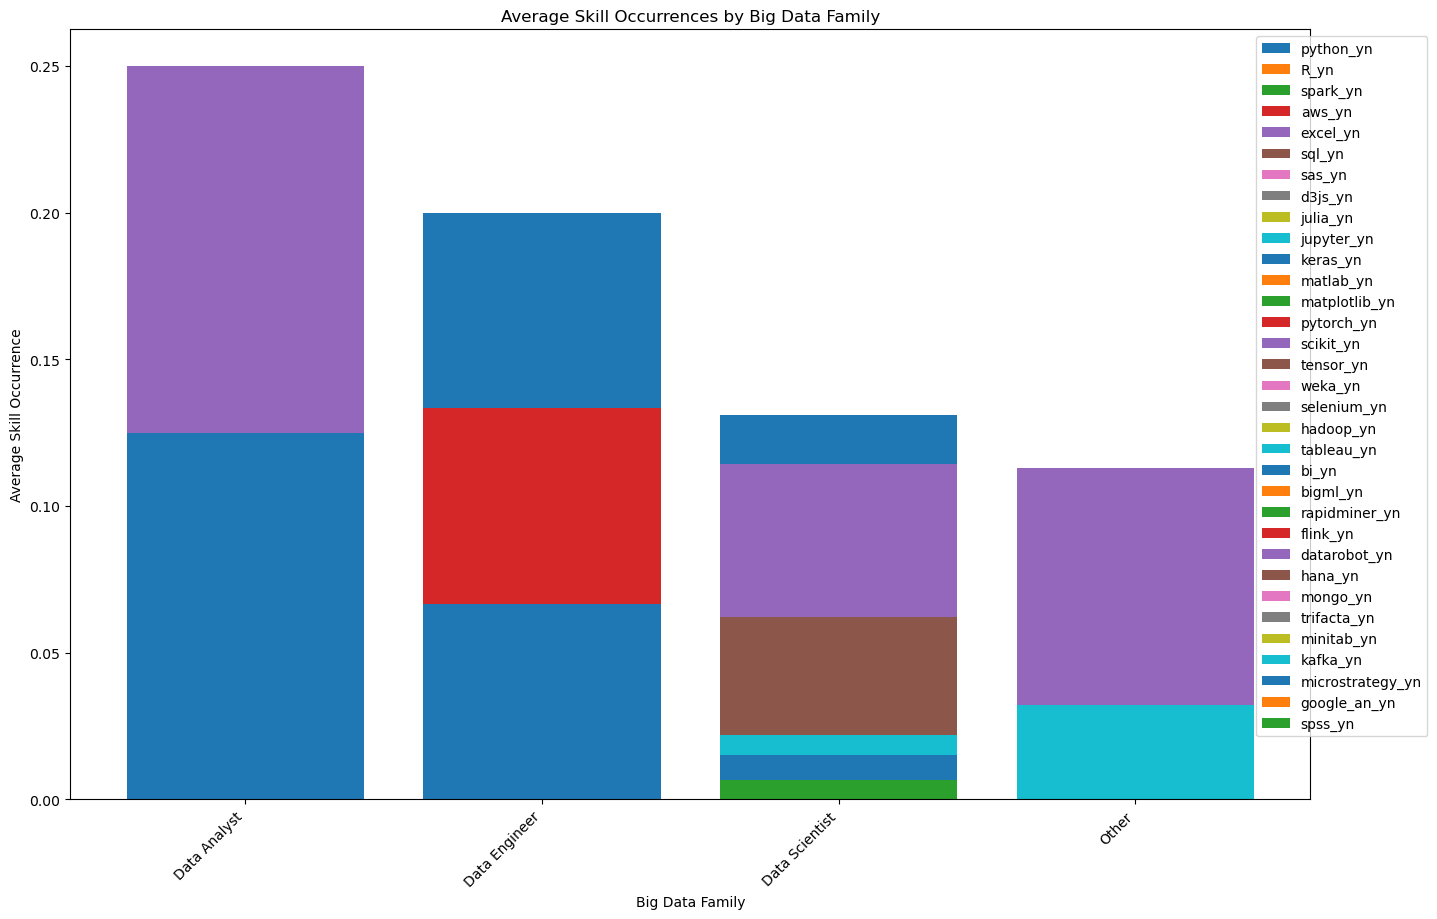

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# You can load your dataset using pd.read_csv or any other appropriate method

# Define the Big Data family names
big_data_families = [
    'Data Engineer',
    'Big Data Analyst',
    'Data Scientist',
    'Data Architect',
    'Hadoop Developer',
    'Spark Developer',
    'Data Analyst'
]

# Create a new column 'Big Data Family' based on the presence of family names in the job title
df['Big Data Family'] = df['Job Title'].apply(lambda title: next((family for family in big_data_families if family.lower() in title.lower()), 'Other'))

# Group by 'Big Data Family' and calculate the average occurrence of each skill
skill_occurrences_by_family = df.groupby('Big Data Family')[skills_columns].mean()

# Plot bar plots for each skill
plt.figure(figsize=(16, 10))

for skill in skills_columns:
    plt.bar(skill_occurrences_by_family.index, skill_occurrences_by_family[skill], label=skill)

plt.title('Average Skill Occurrences by Big Data Family')
plt.xlabel('Big Data Family')
plt.ylabel('Average Skill Occurrence')
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1))
plt.xticks(rotation=45, ha='right')
plt.show()


# **Number of Unique Job Titles**

In [8]:
unique_job_titles = df['Job Title'].nunique()
print("Unique Job Titles:", unique_job_titles)

Unique Job Titles: 330


# **Number of Job Postings by Location**

In [9]:
job_postings_by_location = df['Location'].value_counts()
print("Job Postings by Location:\n", job_postings_by_location)

Job Postings by Location:
 Remote                    58
San Francisco, CA         33
New York, NY              28
Austin, TX                17
Boston, MA                16
                          ..
Stamford, CT               1
Fargo, ND                  1
Rochester, MN              1
Maryland                   1
Cottonwood Heights, UT     1
Name: Location, Length: 252, dtype: int64


# **Top Companies with the Most Job Postings**

In [10]:
# Exclude rows where the company name is '-1'
df_filtered = df[df['Company Name'] != '-1']

# Calculate the number of job postings by company for the filtered DataFrame
company_counts = df_filtered['Company Name'].value_counts()

# Display the top companies with the most job postings
top_companies = company_counts.head(10)  # Change 10 to the desired number of top companies
print(top_companies)

Procter & Gamble\n4.1       6
INTEL\n4.1                  5
TikTok\n3.5                 5
Deloitte\n4.0               4
Intuit\n4.5                 4
Parsons\n3.9                4
Walmart\n3.4                4
JPMorgan Chase & Co\n4.0    4
Notion\n4.9                 4
Activision\n3.5             3
Name: Company Name, dtype: int64


# **Job Postings by Location (Bar Chart)**

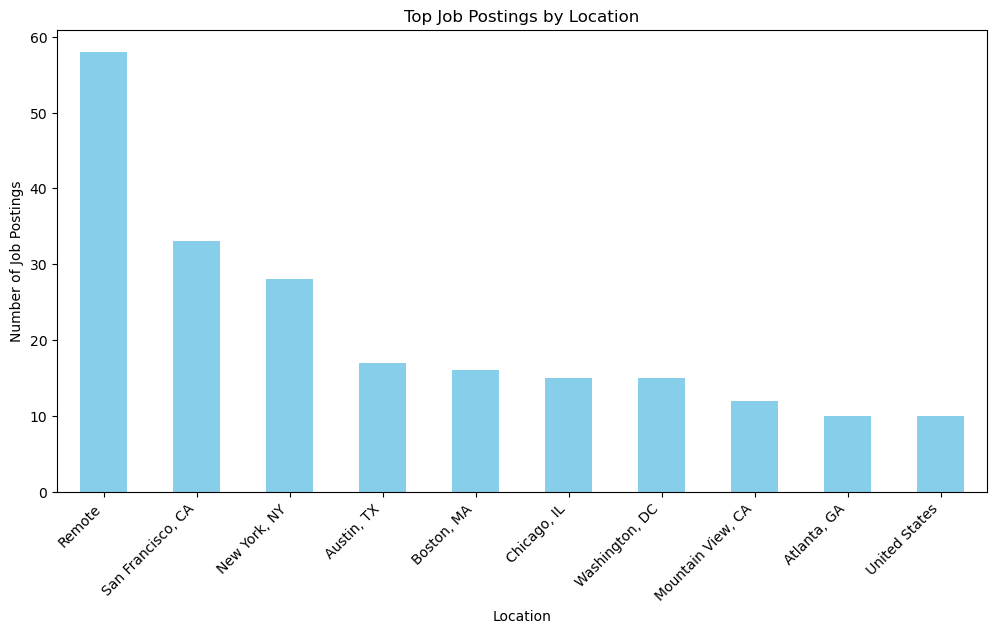

In [11]:
# Calculate the number of job postings by location
location_counts = df['Location'].value_counts()

# Display the top N locations with the highest number of job postings
top_locations = location_counts.head(10)  # Change 10 to the desired number of top locations

# Plot the bar chart
plt.figure(figsize=(12, 6))
top_locations.plot(kind='bar', color='skyblue')
plt.title('Top Job Postings by Location')
plt.xlabel('Location')
plt.ylabel('Number of Job Postings')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

# **Description Length Distribution (Box Plot)**

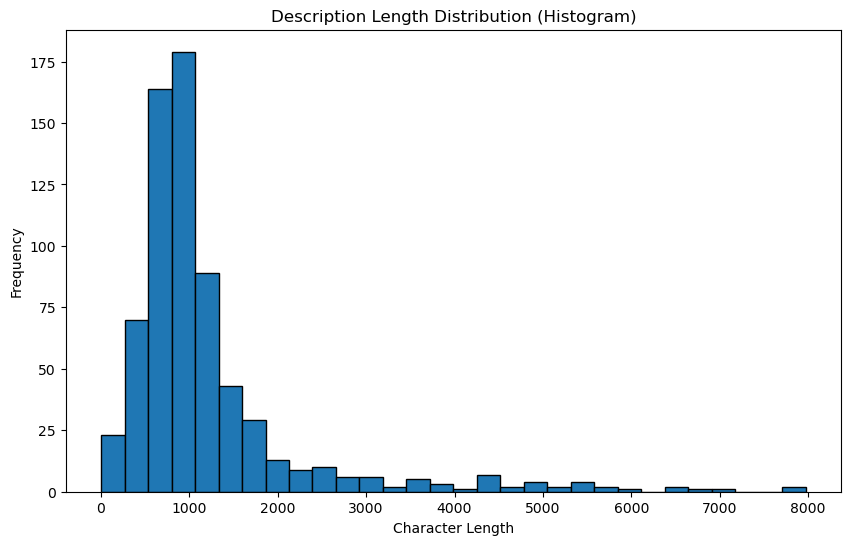

In [12]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df'
df['description_length'] = df['Job Description'].str.len()

# Plotting a histogram
plt.figure(figsize=(10, 6))
plt.hist(df['description_length'], bins=30, edgecolor='black')
plt.title("Description Length Distribution (Histogram)")
plt.xlabel("Character Length")
plt.ylabel("Frequency")
plt.show()


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 680 entries, 0 to 679
Data columns (total 62 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Job Title                 680 non-null    object 
 1   Salary Estimate           680 non-null    object 
 2   Job Description           680 non-null    object 
 3   Rating                    680 non-null    float64
 4   Company Name              680 non-null    object 
 5   Location                  680 non-null    object 
 6   Size                      680 non-null    object 
 7   Founded                   680 non-null    int64  
 8   Type of ownership         680 non-null    object 
 9   Industry                  680 non-null    object 
 10  Sector                    680 non-null    object 
 11  Revenue                   680 non-null    object 
 12  hourly                    680 non-null    int64  
 13  employer_provided         680 non-null    int64  
 14  min_salary

In [14]:
df['HasBenefits'] = ((df['Rating'].notnull()) | (df['Size'].notnull())).astype(int)

In [15]:
df['HasBenefits'].nunique()

1

# **Label Encoding**

In [16]:
from sklearn.preprocessing import LabelEncoder
# Create a label encoder
label_encoder = LabelEncoder()
# Apply label encoding to the 'salary' column
df['salary'] = label_encoder.fit_transform(df['avg_salary'])

# **Define features and target variable**

In [17]:
X = df[['HasBenefits', 'description_length', 'job_state']]
y = df['avg_salary']

# **Perform one-hot encoding on the 'location' feature**

In [18]:
X = pd.get_dummies(X, columns=['job_state'], drop_first=True)

# **Train Test Split**

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Random Forest Classifier**

In [20]:
print(y_train.unique())


[137.  140.   65.  145.  108.  103.5 101.  100.  120.  113.  162.5 111.5
 133.  115.5 133.5 135.  192.5 132.  150.  236.5 220.5 130.5 106.  174.5
 122.  168.5 102.5 116.5  87.  152.5 110.   94.  117.  104.   95.5  89.
 182.5  90.  103.  123.  107.5  75.  174.  107.   96.5  77.5 148.5 105.
 117.5 124.  116.  141.  190.  215.  159.  247.   85.5  70.  112.5 167.5
 136.  111.   98.   82.5 327.   97.  217.  200.5 176.5 249.  142.5  62.
 125.  160.  184.  222.  166.   88.5 147.5 105.5 131.  119.5 134.5 178.
 146.5  98.5 164.5 175.   88.  102.  205.  118.   99.5  96.  175.5  76.5
 114.5 198.5 168.  224.5  94.5 101.5 134.  139.5 126.   76.  137.5 115.
 118.5 114.  124.5 138.  109.  177.5 127.  144.5 123.5 207.5 106.5 165.5
  87.5 159.5 170.5 113.5 143.   83.5 252.5 162.   68.5  48.  136.5 130.
 100.5 149.  145.5 173.  126.5 150.5 172.5 158.  209.5 197.5  75.5 138.5
  63.  204.   73.5 112.  119.  233.  196.  132.5 165.  229.5 154.  153.
 147.   80.  129.5  91.5  72.5 104.5 108.5  70.5 259.   60

In [21]:
y_train = y_train.astype(int)


In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Assuming X is your feature matrix and y is your target variable
# Replace 'threshold_value' with an appropriate threshold for binary classification
threshold_value = 0.5
y_binary = (y >= threshold_value).astype(int)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

# Instantiate RandomForestClassifier
rf_classifier = RandomForestClassifier()

# Fit the model
rf_classifier.fit(X_train, y_train)

# Make predictions
rf_predictions = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, rf_predictions)
classification_report_result = classification_report(y_test, rf_predictions)

print(f'Random Forest Classifier Accuracy: {accuracy:.2f}')
print(classification_report_result)


Random Forest Classifier Accuracy: 1.00
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       136

    accuracy                           1.00       136
   macro avg       1.00      1.00      1.00       136
weighted avg       1.00      1.00      1.00       136



# **k-Nearest Neighbors (KNN)**

In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np

# Assuming X_train and X_test are DataFrames
X_train_array = X_train.to_numpy()
X_test_array = X_test.to_numpy()

# Instantiate KNeighborsClassifier
knn_classifier = KNeighborsClassifier()

# Fit the model
knn_classifier.fit(X_train_array, y_train)

# Make predictions
knn_predictions = knn_classifier.predict(X_test_array)

# Evaluate the model
knn_accuracy = accuracy_score(y_test, knn_predictions)
classification_report_result = classification_report(y_test, rf_predictions)

print("k-Nearest Neighbors (KNN) Accuracy:", knn_accuracy)
print(classification_report_result)


k-Nearest Neighbors (KNN) Accuracy: 1.0
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       136

    accuracy                           1.00       136
   macro avg       1.00      1.00      1.00       136
weighted avg       1.00      1.00      1.00       136



In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


# **Linear Regression**

In [25]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)
regression_predictions = regression_model.predict(X_test)

# Evaluate the model using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, regression_predictions)
print("Mean Squared Error (MSE):", mse)
# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, regression_predictions)
# Calculate the Root Mean Squared Error (RMSE)
rmse = mse ** 0.5
print("Root Mean Squared Error (RMSE):", rmse)
from sklearn.metrics import r2_score

# Calculate the R2 score
r2 = r2_score(y_test, regression_predictions)

print("R-squared (R2) Score:", r2)


Mean Squared Error (MSE): 0.0
Root Mean Squared Error (RMSE): 0.0
R-squared (R2) Score: 1.0


# **Ridge Regression**

In [26]:
from sklearn.linear_model import Ridge
ridge_model = Ridge(alpha=1.0)  # You can adjust the alpha hyperparameter
ridge_model.fit(X_train, y_train)
ridge_predictions = ridge_model.predict(X_test)

# Calculate Mean Squared Error (MSE) and Root Mean Squared Error (RMSE)
mse = mean_squared_error(y_test, ridge_predictions)
rmse = mse ** 0.5
# Calculate the R2 score
r2 = r2_score(y_test, ridge_predictions)

print("R-squared (R2) Score:", r2)
print("Ridge Regression Mean Squared Error (MSE):", mse)
print("Ridge Regression Root Mean Squared Error (RMSE):", rmse)

R-squared (R2) Score: 1.0
Ridge Regression Mean Squared Error (MSE): 0.0
Ridge Regression Root Mean Squared Error (RMSE): 0.0


In [27]:
# Check the shape of your training features (X_train) and target variable (y_train)
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)

# Alternatively, you can print the length of your training data
print("Number of samples in the training set:", len(X_train))

Shape of X_train: (544, 51)
Shape of y_train: (544,)
Number of samples in the training set: 544
